<a href="https://colab.research.google.com/github/Supriya840/Chess-Playing-Robotic-arm-development/blob/main/hough_line_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from google.colab import files
uploaded = files.upload()

Saving im_7.jpg to im_7 (1).jpg


In [6]:
new_board = cv2.imread('im_7.jpg')
new_board = cv2.cvtColor(new_board, cv2.COLOR_BGR2RGB)

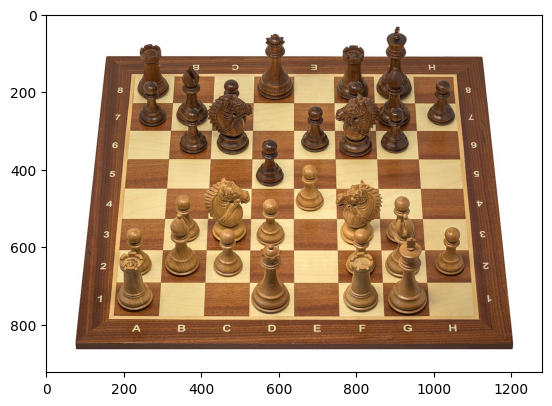

In [7]:
plt.imshow(new_board)

In [8]:
gray_new_board = cv2.cvtColor(new_board, cv2.COLOR_RGB2GRAY)

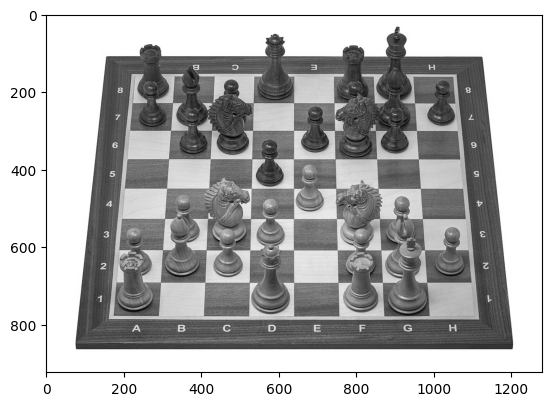

In [9]:
plt.imshow(gray_new_board, cmap='gray')

In [10]:
from google.colab import files
uploaded = files.upload()

Saving im_7.jpg to im_7 (2).jpg


In [11]:
real_board = cv2.imread('im_7.jpg')
real_board = cv2.cvtColor(real_board, cv2.COLOR_BGR2RGB)

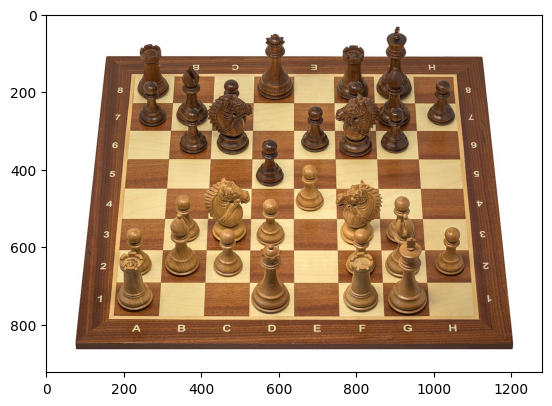

In [12]:
plt.imshow(real_board)

In [13]:
gray_real_board = cv2.cvtColor(real_board, cv2.COLOR_RGB2GRAY)

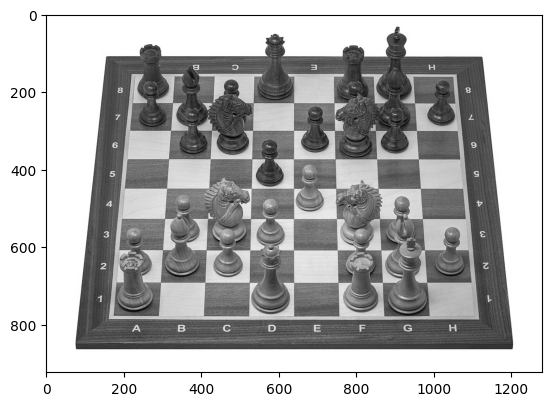

In [14]:
plt.imshow(gray_real_board, cmap='gray')

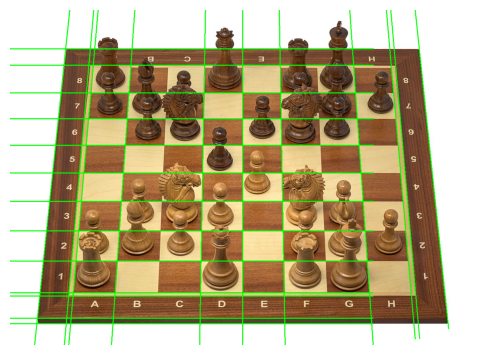

In [15]:
gray = cv2.cvtColor(real_board, cv2.COLOR_RGB2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
edges = cv2.Canny(blur, 50, 150, apertureSize=3)

lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

real_copy_hough = real_board.copy()
if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(real_copy_hough, (x1,y1), (x2,y2), (0,255,0), 2)

plt.figure(figsize=(6,6))
plt.imshow(real_copy_hough)
plt.axis("off")
plt.show()